# Installations

In [ ]:
!pip install sounddevice

In [ ]:
!sudo apt-get install portaudio19-dev
!pip install PyAudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 2s (117 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEn

# Uploading [GTZAN Dataset](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification) from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deenafathimohamed","key":"7343a0ab366cd8ecec2d6d7630d1ada7"}'}

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

-rw-r--r-- 1 root root 73 Dec 27 20:55 kaggle.json
/content


In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

100% 1.21G/1.21G [00:43<00:00, 32.0MB/s]
100% 1.21G/1.21G [00:43<00:00, 30.2MB/s]


In [ ]:
import zipfile
import os

zip_file_path = '/content/gtzan-dataset-music-genre-classification.zip'
extract_folder = '/content'

# Create the extraction folder if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Unzip the contents using shell command in Colab
!unzip {zip_file_path} -d {extract_folder}

print(f"Successfully extracted contents to {extract_folder}")

Archive:  /content/gtzan-dataset-music-genre-classification.zip
  inflating: /content/Data/features_30_sec.csv  
  inflating: /content/Data/features_3_sec.csv  
  inflating: /content/Data/genres_original/blues/blues.00000.wav  
  inflating: /content/Data/genres_original/blues/blues.00001.wav  
  inflating: /content/Data/genres_original/blues/blues.00002.wav  
  inflating: /content/Data/genres_original/blues/blues.00003.wav  
  inflating: /content/Data/genres_original/blues/blues.00004.wav  
  inflating: /content/Data/genres_original/blues/blues.00005.wav  
  inflating: /content/Data/genres_original/blues/blues.00006.wav  
  inflating: /content/Data/genres_original/blues/blues.00007.wav  
  inflating: /content/Data/genres_original/blues/blues.00008.wav  
  inflating: /content/Data/genres_original/blues/blues.00009.wav  
  inflating: /content/Data/genres_original/blues/blues.00010.wav  
  inflating: /content/Data/genres_original/blues/blues.00011.wav  
  inflating: /content/Data/genres_o

# Visualizing one sample from the dataset to see how the data is like to Know how to Work on the full Dataset

In [ ]:
import numpy as np
import librosa, librosa.display # librosa, librosa.display (for music and audio analysis)
import matplotlib.pyplot as plt
import random

In [ ]:
example_file = "/content/Data/genres_original/disco/disco.00001.wav"

In [ ]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [ ]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [ ]:
print(sample_rate)

22050


In [ ]:
FIG_SIZE = (8,4)

Text(0.5, 1.0, 'Waveform')

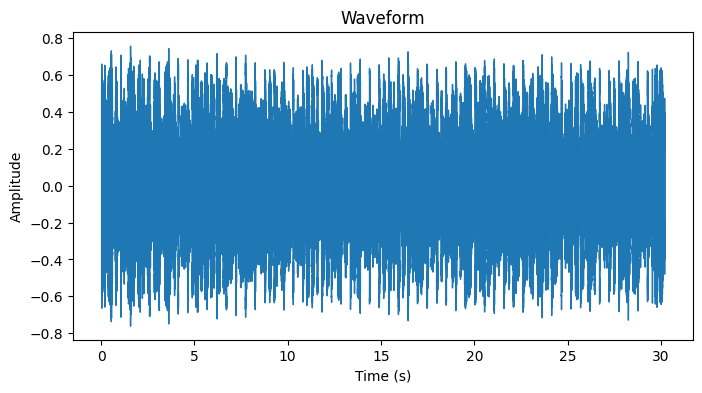

In [ ]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [ ]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

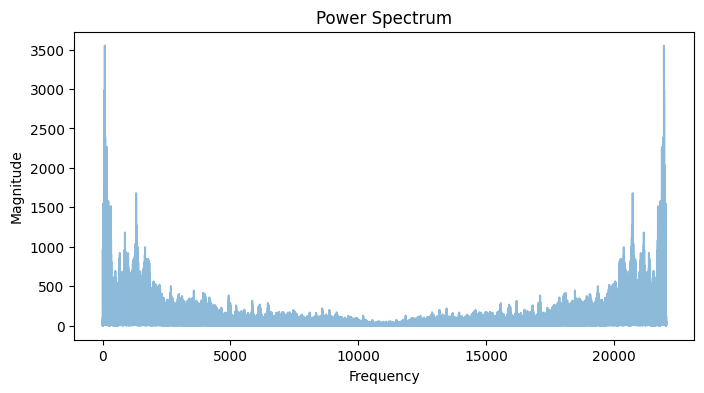

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

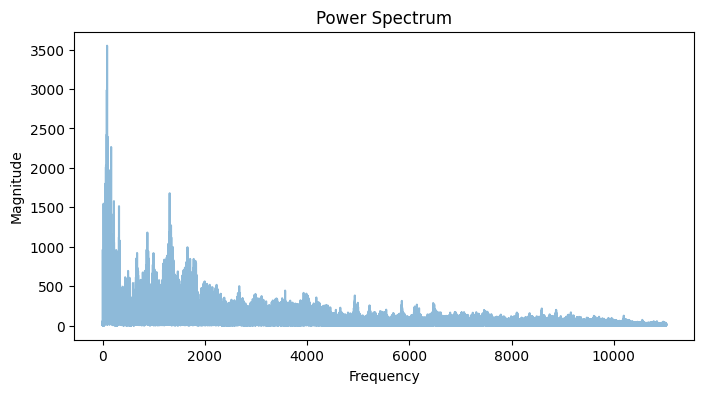

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [ ]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

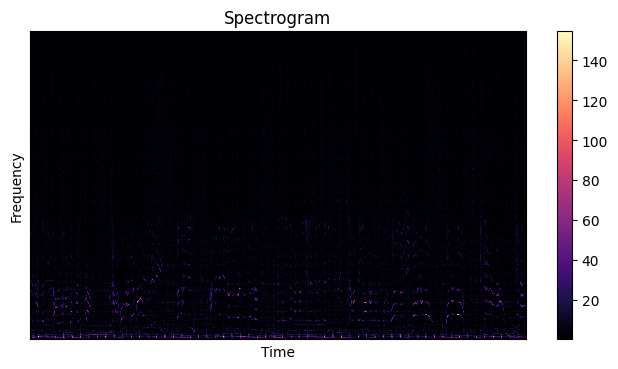

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

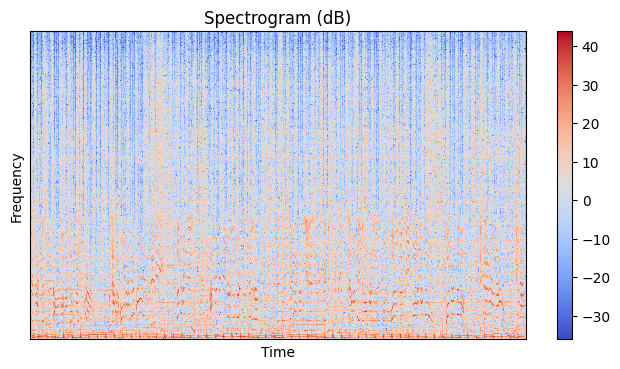

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram (dB)")

In [ ]:
# MFCCs (we use 13 MFCCs)
# Calculate MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

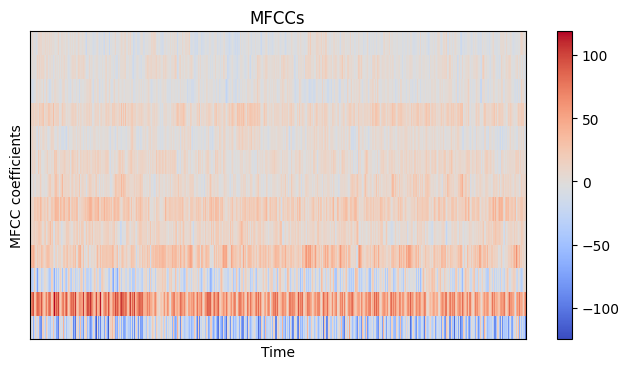

In [ ]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# Feature extraction using MFCCs

In [ ]:
import json
import os
import math

In [ ]:
DATASET_PATH = "/content/Data/genres_original"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """
    Extracts MFCCs from music dataset and saves them into a json file along with genre labels.

    Parameters:
      -dataset_path: Root directory with genre sub-folders containing audio files.
      -json_path: Path to save extracted MFCCs and labels in a JSON file.
      -num_mfcc: Number of MFCCs to extract per audio segment (default: 13).
      -n_fft: Samples for each STFT frame (default: 2048).
      -hop_length: Samples between consecutive STFT frames (default: 512).
      -num_segments: Number of segments per audio file (default: 5).

    Data Structure:
      -data dictionary:
        ."mapping": List of genre labels.
        ."labels": List of numeric labels corresponding to genres.
        ."mfcc": List of extracted MFCCs for each audio segment.

    Processing:
      -Iterates through genre sub-folders, processing each audio file.
      -Divides audio into segments and calculates MFCCs for each segment.
      -Stores MFCCs and labels in the data dictionary.

    File Saving:
      -Saves collected MFCCs and labels to a JSON file specified by json_path.
      -Data is formatted with an indentation of 4 spaces.
      -Output Information:

    Prints processing information:
      -index, genre label, file name, and segment number.

    """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    i = 0
    # loop through all genre sub-folder
    for dirpath, dirnames, filenames in os.walk(dataset_path):

        # skip the root folder
        if dirpath == dataset_path:
            continue

        # check if there are audio files in the current directory
        audio_files = [f for f in filenames if f.endswith(('.wav', '.mp3'))]
        if not audio_files:
            continue

        # save genre label (i.e., sub-folder name) in the mapping
        semantic_label = dirpath.split("/")[-1]
        data["mapping"].append(semantic_label)
        print("\nProcessing: {} - {}".format(i, semantic_label))

        # process all audio files in genre sub-dir
        for f in audio_files:

            # load audio file
            file_path = os.path.join(dirpath, f)
            signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

            # process all segments of audio file
            for d in range(num_segments):

                # calculate start and finish sample for the current segment
                start = samples_per_segment * d
                finish = start + samples_per_segment

                # extract mfcc
                mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc,
                                            n_fft=n_fft, hop_length=hop_length)
                mfcc = mfcc.T

                # store only mfcc feature with the expected number of vectors
                if len(mfcc) == num_mfcc_vectors_per_segment:
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(i)
                    print("Index: {}, Classname: {}, File: {}, Segment: {}".format(i, semantic_label, f, d + 1))

        # increment index for the next sub-folder
        i += 1
    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
# Call the function with the appropriate arguments
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10) # removed jazz54 file manually gives wierd error?

Streaming output truncated to the last 5000 lines.
Index: 5, Classname: country, File: country.00034.wav, Segment: 8
Index: 5, Classname: country, File: country.00034.wav, Segment: 9
Index: 5, Classname: country, File: country.00034.wav, Segment: 10
Index: 5, Classname: country, File: country.00012.wav, Segment: 1
Index: 5, Classname: country, File: country.00012.wav, Segment: 2
Index: 5, Classname: country, File: country.00012.wav, Segment: 3
Index: 5, Classname: country, File: country.00012.wav, Segment: 4
Index: 5, Classname: country, File: country.00012.wav, Segment: 5
Index: 5, Classname: country, File: country.00012.wav, Segment: 6
Index: 5, Classname: country, File: country.00012.wav, Segment: 7
Index: 5, Classname: country, File: country.00012.wav, Segment: 8
Index: 5, Classname: country, File: country.00012.wav, Segment: 9
Index: 5, Classname: country, File: country.00012.wav, Segment: 10
Index: 5, Classname: country, File: country.00066.wav, Segment: 1
Index: 5, Classname: co

## Loading the newly created Features

In [ ]:
DATA_PATH = "/content/data.json"

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    map = np.array(data["mapping"])

    print("Data succesfully loaded!")

    return  X, y, map

In [ ]:
# load data
X, y, map = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
print(map)

['disco' 'metal' 'classical' 'hiphop' 'jazz' 'country' 'blues' 'reggae'
 'rock' 'pop']


In [ ]:
# Assuming you have a NumPy array of genre names
genres_array = np.array(map)

# Create a dictionary with indices
genre_dict = {index: genre for index, genre in enumerate(genres_array)}

# Print the resulting dictionary
print(genre_dict)

{0: 'disco', 1: 'metal', 2: 'classical', 3: 'hiphop', 4: 'jazz', 5: 'country', 6: 'blues', 7: 'reggae', 8: 'rock', 9: 'pop'}


# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets to fix shape
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(5991, 130, 13, 1)

In [ ]:
X_test.shape

(2497, 130, 13, 1)

In [ ]:
X_validation.shape

(1498, 130, 13, 1)

# Helper Functions

In [ ]:
def process_input(audio_file, track_duration):
  '''
  Process audio that is not from the dataset
  '''
  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)

  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    '''
    Used to create the confusion matrix of the data
    '''
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

# Cnn Model

## Creation, Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = Sequential()

# 1st conv layer
model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(BatchNormalization())

# 2nd conv layer
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(BatchNormalization())

# 3rd conv layer
model_cnn.add(Conv2D(256, (2, 2), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.5))

# output layer
model_cnn.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimizer,
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=15)

Epoch 1/15
188/188 [==============================] - 4s 8ms/step - loss: 1.9389 - accuracy: 0.4136 - val_loss: 1.3969 - val_accuracy: 0.5013
Epoch 2/15
188/188 [==============================] - 1s 6ms/step - loss: 1.2231 - accuracy: 0.5927 - val_loss: 1.0525 - val_accuracy: 0.6455
Epoch 3/15
188/188 [==============================] - 1s 6ms/step - loss: 0.9403 - accuracy: 0.6777 - val_loss: 0.9533 - val_accuracy: 0.6622
Epoch 4/15
188/188 [==============================] - 1s 6ms/step - loss: 0.7089 - accuracy: 0.7530 - val_loss: 0.8859 - val_accuracy: 0.6862
Epoch 5/15
188/188 [==============================] - 1s 6ms/step - loss: 0.5868 - accuracy: 0.7949 - val_loss: 0.8091 - val_accuracy: 0.7210
Epoch 6/15
188/188 [==============================] - 1s 6ms/step - loss: 0.4740 - accuracy: 0.8376 - val_loss: 0.8464 - val_accuracy: 0.7163
Epoch 7/15
188/188 [==============================] - 1s 6ms/step - loss: 0.3867 - accuracy: 0.8665 - val_loss: 0.8539 - val_accuracy: 0.7176
Epoch 

## Ploting the Model Accuracy

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.subplots_adjust(hspace=0.5)

    plt.show()

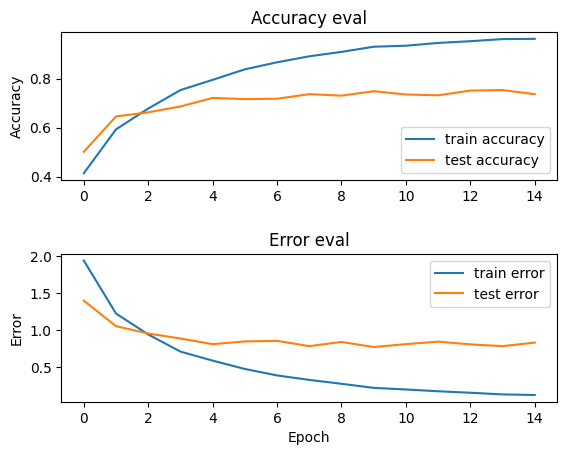

In [ ]:
plot_history(history)

## Prediction & Evaluation

In [ ]:
val_loss, val_acc = model_cnn.evaluate(X_test, y_test, batch_size=128)
print(f'Test Accuracy: {val_acc * 100:.2f}%')

20/20 [==============================] - 0s 6ms/step - loss: 0.8006 - accuracy: 0.7549
Test Accuracy: 75.49%


### Predicting the first 10 samples of X_validaation

In [ ]:
for n in range(10):
    i = random.randint(0, len(X_validation))

    # pick a sample to predict from the val set
    X_to_predict = X_validation[i]
    y_to_predict = y_validation[i]

    print("\nReal Genre:", genre_dict[y_to_predict])

    X_to_predict = X_to_predict[np.newaxis, ...]

    prediction = model_cnn.predict(X_to_predict)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Predicted Genre:", genre_dict[int(predicted_index)])


Real Genre: reggae
1/1 [==============================] - 0s 110ms/step
Predicted Genre: reggae

Real Genre: pop
1/1 [==============================] - 0s 17ms/step
Predicted Genre: pop

Real Genre: classical
1/1 [==============================] - 0s 19ms/step
Predicted Genre: classical

Real Genre: country
1/1 [==============================] - 0s 18ms/step
Predicted Genre: country

Real Genre: classical
1/1 [==============================] - 0s 17ms/step
Predicted Genre: classical

Real Genre: country
1/1 [==============================] - 0s 17ms/step
Predicted Genre: country

Real Genre: country
1/1 [==============================] - 0s 18ms/step
Predicted Genre: country

Real Genre: blues
1/1 [==============================] - 0s 18ms/step
Predicted Genre: blues

Real Genre: reggae
1/1 [==============================] - 0s 18ms/step
Predicted Genre: hiphop

Real Genre: rock
1/1 [==============================] - 0s 19ms/step
Predicted Genre: rock


## Confusion Matrix

79/79 [==============================] - 0s 2ms/step


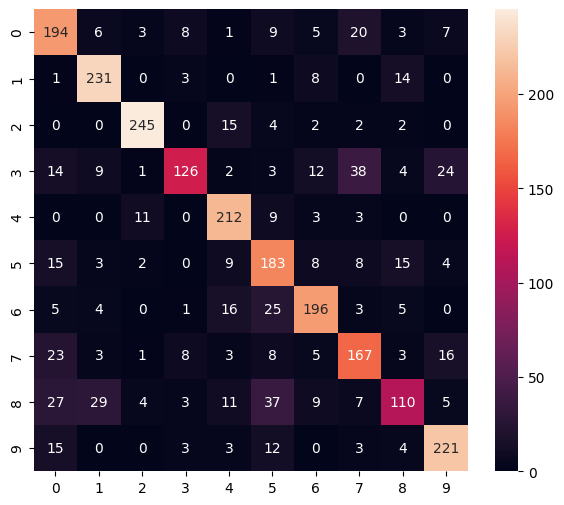

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       256
           1       0.81      0.90      0.85       258
           2       0.92      0.91      0.91       270
           3       0.83      0.54      0.65       233
           4       0.78      0.89      0.83       238
           5       0.63      0.74      0.68       247
           6       0.79      0.77      0.78       255
           7       0.67      0.70      0.68       237
           8       0.69      0.45      0.55       242
           9       0.80      0.85      0.82       261

    accuracy                           0.75      2497
   macro avg       0.76      0.75      0.75      2497
weighted avg       0.76      0.75      0.75      2497



In [ ]:
Y_pred = model_cnn.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# SVM Model

## Hyperprameter tuning Using Validation Data

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model

# Create a new model for feature extraction to flatten data because
feature_extractor = Model(inputs=model_cnn.input, outputs=model_cnn.get_layer('flatten_1').output)

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'], 'kernel': ['linear', 'rbf']}

# Create the SVM model
svm_model = SVC()

# Create GridSearchCV object with additional parameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

In [ ]:
X_val = feature_extractor.predict(X_validation)

47/47 [==============================] - 0s 6ms/step


In [ ]:
# Fit the model to the data
grid_search.fit(X_val, y_validation)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


## Model Training on the Train data

In [ ]:
# Use the best model for prediction
best_svm_model = SVC(C=0.1, gamma=0.1, kernel='linear')

In [ ]:
X_tr = feature_extractor.predict(X_train)

188/188 [==============================] - 0s 2ms/step


In [ ]:
best_svm_model.fit(X_tr, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

## Prediction

In [ ]:
X_ts = feature_extractor.predict(X_test)

79/79 [==============================] - 0s 2ms/step


In [ ]:
svm_predictions = best_svm_model.predict(X_ts)

In [ ]:
# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, svm_predictions)
print(f'Test Set Accuracy: {accuracy * 100:.2f}%')

Test Set Accuracy: 79.82%


### Predicting the first 10 samples of X_validaation

In [ ]:
for n in range(10):
    i = random.randint(0, len(X_validation))

    # pick a sample to predict from the validation set
    X_predict = X_validation[i]
    y_predict = y_validation[i]

    print("\nReal Genre:", genre_dict[y_predict])

    # Ensure the input shape is compatible with the SVM model
    X_predict = X_predict[np.newaxis, ...]

    # Extract features using the CNN feature extractor
    features_predict = feature_extractor.predict(X_predict)

    # Predict using SVM model
    svm_predicted_label = best_svm_model.predict(features_predict)

    print("Predicted Genre:", genre_dict[int(svm_predicted_label)])


Real Genre: pop
1/1 [==============================] - 0s 26ms/step
Predicted Genre: pop

Real Genre: blues
1/1 [==============================] - 0s 32ms/step
Predicted Genre: blues

Real Genre: blues
1/1 [==============================] - 0s 29ms/step
Predicted Genre: blues

Real Genre: disco
1/1 [==============================] - 0s 30ms/step
Predicted Genre: pop

Real Genre: classical
1/1 [==============================] - 0s 29ms/step
Predicted Genre: classical

Real Genre: country
1/1 [==============================] - 0s 30ms/step
Predicted Genre: country

Real Genre: jazz
1/1 [==============================] - 0s 27ms/step
Predicted Genre: jazz

Real Genre: jazz
1/1 [==============================] - 0s 27ms/step
Predicted Genre: jazz

Real Genre: metal
1/1 [==============================] - 0s 29ms/step
Predicted Genre: blues

Real Genre: hiphop
1/1 [==============================] - 0s 26ms/step
Predicted Genre: hiphop


## Confusion Matrix

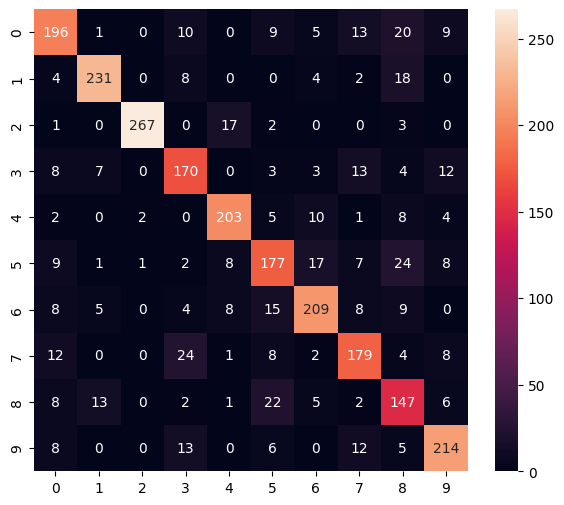

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       263
           1       0.90      0.87      0.88       267
           2       0.99      0.92      0.95       290
           3       0.73      0.77      0.75       220
           4       0.85      0.86      0.86       235
           5       0.72      0.70      0.71       254
           6       0.82      0.79      0.80       266
           7       0.76      0.75      0.75       238
           8       0.61      0.71      0.66       206
           9       0.82      0.83      0.82       258

    accuracy                           0.80      2497
   macro avg       0.80      0.79      0.79      2497
weighted avg       0.80      0.80      0.80      2497



In [ ]:
# Confusion matrix and classification report
print_confusion_matrix(svm_predictions, y_test)

# Testing New input not from the dataset

In [ ]:
new_input_mfcc = process_input("/content/drive/MyDrive/test.wav", 30)

In [ ]:
type(new_input_mfcc), new_input_mfcc.shape

(numpy.ndarray, (130, 13))

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted CNN Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 28ms/step
Predicted CNN Genre: jazz


In [ ]:
X_to_pred = feature_extractor.predict(X_to_predict)
pred = best_svm_model.predict(X_to_pred)

# get index with max value
pred_index = np.argmax(pred)

print("Predicted SVM Genre:", genre_dict[int(pred_index)])

1/1 [==============================] - 0s 97ms/step
Predicted SVM Genre: disco


# Testing on Real Time Input data

In [ ]:
def predict_audio(svm, cnn, audio=None):
    '''
    Process In real time audio
    '''
    if audio is not None:
        audio = audio.squeeze()
        feat = process_input(audio=audio)

    y_pred = svm.predict(feat)
    print(f"SVM prediction: {y_pred[0]}")

    y_pred = cnn.predict(feat)
    print(f"CNN prediction: {y_pred[0]}")

In [ ]:
import sounddevice as sd

audio = sd.rec(int(30 * 22050), samplerate=22050, channels=1, dtype=np.float32)
sd.wait()
predict_audio(best_svm_model, model_cnn, audio=audio)

sd.play(audio)
sd.wait()

PortAudioError: ignored